# Single Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_data = pd.read_csv('Boston House Prices.csv')
boston_data.head()

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


In [3]:
boston_data.shape

(506, 3)

In [4]:
boston_data.isnull().sum()

Rooms       0
Distance    0
Value       0
dtype: int64

In [5]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     506 non-null    float64
 1   Distance  506 non-null    float64
 2   Value     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [6]:
# Assumptions Check

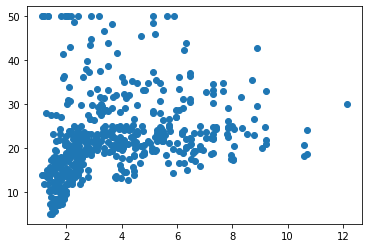

In [15]:
plt.scatter(x = 'Distance' , y = 'Value' , data = boston_data)

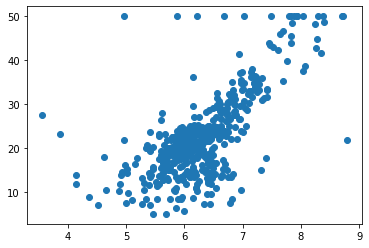

In [18]:
plt.scatter(x = 'Rooms', y = 'Value', data = boston_data)

In [20]:
boston_data.corr()

,Rooms,Distance,Value
Rooms,1.000000,0.205246,0.695360
Distance,0.205246,1.000000,0.249929
Value,0.695360,0.249929,1.000000


# Linear regression can be build by 2 libraries:


###            1. Statsmodels
###            2. Sklearn

## Linear  Regression with Statsmodels

In [21]:
# Statsmodels is a module that helps us conduct statistical tests and estimate models. 
# It provides an extensive list of results for each estimator.

In [25]:
import statsmodels.formula.api as smf

#### Dependent variable   -  Value
#### Independent variable -  Rooms

In [27]:
#ols - ordinary least sqaures --> Inorder to find the best fit line.

model = smf.ols('Value~Rooms',data = boston_data).fit() #Model Training

In [29]:
model.predict(boston_data)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           2.49e-74
Time:                        18:11:25   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# OLS stands for Ordinary Least Squares and this is the most common method to estimate linear regression.

<AxesSubplot:xlabel='Rooms', ylabel='Value'>

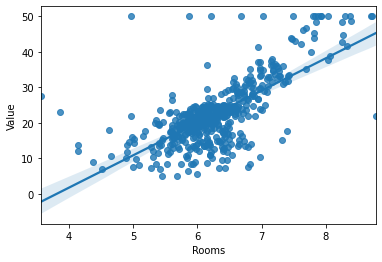

In [31]:
sns.regplot(x='Rooms',y='Value',data=boston_data)

In [32]:
model.params

Intercept   -34.670621
Rooms         9.102109
dtype: float64

# Multiple Linear Regression

#### Dependent variable   :    Value
#### Independent variable :    Rooms  and  Distance

In [33]:
model1 = smf.ols('Value~Rooms + Distance', data = boston_data).fit()

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.84e-75
Time:                        19:35:35   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Linear Regression with sklearn

In [36]:
from sklearn import linear_model

In [37]:
y = boston_data['Value'] # dependent variable
X = boston_data[['Rooms', 'Distance']] # independent variable

In [38]:
lm = linear_model.LinearRegression()
lm.fit(X, y) # fitting the model

LinearRegression()

In [39]:
lm.predict(X)

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776,
       24.92052548, 20.99628003, 22.59515685, 17.89792552, 21.43016488,
       24.59312806, 21.29554669, 19.86012857, 20.02480328, 21.19854962,
       18.91052046, 19.79946305, 20.16587486, 15.24036623, 17.62554884,
       16.24441157, 19.82577837, 21.36632302, 18.52848931, 19.65425152,
       16.82067934, 18.81534563, 20.76312523, 24.70679323, 26.17680132,
       17.71571146, 20.84706509, 19.68285587, 17.39216584, 20.85532906,
       19.22540394, 18.42427779, 18.77543693, 19.75391977, 26.04958067,
       29.82538634, 27.7461615 , 22.45651299, 22.82617229, 21.57637181,
       17.86689491, 18.78224174, 21.21771802, 15.7523132 , 17.64542212,
       21.17812468, 22.51593928, 26.00129836, 21.48617409, 20.7648873 ,
       33.41670435, 26.03470634, 29.42393915, 23.26887906, 20.91861579,
       19.42498135, 21.20638654, 25.71803969, 28.7805479 , 32.39778062,
       23.95685233, 19.52974218, 20.27518634, 17.77558538, 20.33

In [40]:
lm.coef_

array([8.80141183, 0.48884854])

In [41]:
lm.intercept_

-34.636050175473315